In [73]:
!pip install svgling

In [74]:
sentence = "I would like to buy some sneakers from ebay"

In [75]:
import nltk
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/ashwanthfernando/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/ashwanthfernando/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

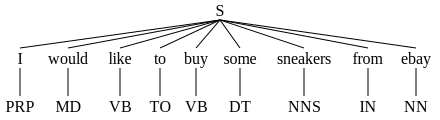

In [82]:
sentence = "I would like to buy some sneakers from ebay"
words = nltk.word_tokenize(sentence)
tagged_elements=nltk.pos_tag(words)
tree = nltk.ne_chunk(tagged_elements)
tree

In [81]:
import nltk
from nltk import pos_tag, word_tokenize, ne_chunk, Tree

def extract_intent(tree: Tree) -> tuple:
    """
    Extracts the subject and action from a named entity chunked tree.

    Args:
        tree (Tree): An NLTK Tree object representing a named entity chunked sentence.

    Returns:
        tuple: A tuple containing the subject and action as strings.
    """
    subject = None
    action = None

    for subtree in tree:
        if isinstance(subtree, Tree):
            if subtree.label() == 'NP':  # Noun Phrase
                subject = ' '.join(leaf[0] for leaf in subtree.leaves())
            elif subtree.label() == 'VP':  # Verb Phrase
                for vp_subtree in subtree:
                    if isinstance(vp_subtree, Tree) and vp_subtree.label().startswith('VB'):  # Verb
                        action = ' '.join(leaf[0] for leaf in vp_subtree.leaves())
        else:
            # Handle flat structure where subtree is a tuple (word, POS)
            word, pos = subtree
            if pos.startswith('VB') and action is None:
                action = word
            elif pos.startswith('NN') and subject is None:
                subject = word

    return subject, action

subject, action = extract_intent(tree)
print(f"Subject: {subject}")
print(f"Action: {action}")

Subject: sneakers
Action: like
